# Q1

In [ ]:
Objective: The objective of this assignment is to assess students' understanding of batch normalization in
artificial neural networks (ANN) and its impact on training performance.
Q1. Theory and Concepts: 
1. Explain the concept of batch normalization in the context of Artificial Neural Networksr
2. Describe the benefits of using batch normalization during trainingr
3. Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.


Ans:-
    
    Q1. Theory and Concepts:

1. Batch Normalization in Artificial Neural Networks (ANN):
Batch normalization is a technique used to improve the training process of artificial neural networks by normalizing the inputs of each layer. The idea behind batch normalization is to address the problem of internal covariate shift, which refers to the change in the distribution of intermediate layer activations during training. By normalizing the activations, batch normalization ensures that each layer's inputs have a consistent mean and variance, which helps in stabilizing and accelerating the training process.
The normalization is applied on a per-mini-batch basis, where a mini-batch is a subset of the training data. During training, the inputs to a layer are normalized by subtracting the mean and dividing by the standard deviation of the current mini-batch. The normalized activations are then scaled and shifted using learnable parameters to introduce flexibility and expressiveness to the model.

#### Benefits of using Batch Normalization during Training:
There are several benefits of incorporating batch normalization during the training of neural networks:
a. Faster Convergence: Batch normalization reduces internal covariate shift, enabling more stable and consistent updates during training. This leads to faster convergence, meaning the network reaches a desired level of accuracy in fewer training iterations.

b. Higher Learning Rates: With batch normalization, the gradients propagated through the network are less likely to vanish or explode. This allows the use of higher learning rates, which can further speed up training and help escape poor local minima.

c. Regularization Effect: Batch normalization has a slight regularization effect due to the noise introduced by the mini-batch statistics. This can help reduce overfitting and improve the generalization ability of the model.

d. Independence from Initialization: Batch normalization makes the network less sensitive to weight initialization. It helps alleviate the vanishing or exploding gradient problems, making it easier to train deep networks.

e. Improved Gradient Flow: Batch normalization helps maintain a more consistent magnitude of gradients throughout the network, which facilitates more stable and efficient training.

Q3. Working Principle of Batch Normalization:
The working principle of batch normalization can be summarized in the following steps:

1. Normalization: For each mini-batch during training, the activations of a layer are normalized to have zero mean and unit variance. This is achieved by subtracting the mean and dividing by the standard deviation of the activations within the mini-batch.

2. Scaling and Shifting: After normalization, the normalized activations are scaled and shifted using learnable parameters. This introduces flexibility to the layer's transformation and allows the model to learn the optimal scale and shift for the normalized activations.

3. Learnable Parameters: Each batch-normalized layer has two learnable parameters: gamma (γ) and beta (β). Gamma is used to scale the normalized activations, while beta is used to shift them. These parameters are learned during training through backpropagation, just like other neural network parameters.

4. Inference: During inference or testing, the statistics used for normalization are typically not computed from the mini-batch but instead accumulated from the entire training set. This ensures consistent behavior during inference and prevents the model from depending on specific mini-batch statistics.

In summary, batch normalization improves the training of neural networks by normalizing layer activations within mini-batches and introducing learnable parameters to scale and shift the normalized values, leading to faster convergence and more stable training.

# Q2

In [ ]:
Q2. Impementation:
1. Choose a dataset of your choice (e.g., MNIST, CIFAR-0) and preprocess it.
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,
Tensorlow, PyTorch).
3. Train the neural network on the chosen dataset without using batch normalization.
4. Implement batch normalization layers in the neural network and train the model againr
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and
without batch normalization.
6. Discuss the impact of batch normalization on the training process and the performance of the neural
network.

Ans:-
    
    Step 1: Preprocess the Dataset
We'll use the MNIST dataset, which contains images of handwritten digits (0 to 9). The images are grayscale, and each has a size of 28x28 pixels. We'll normalize the pixel values to the range [0, 1] and split the data into training and validation sets.

In [3]:
pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 6.9 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.8 MB/s eta 0:00:00
     ------------------------------------- 181.8

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [4]:
pip install torch torchvision


     -------------------------------------- 172.4/172.4 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.0 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset and split it into training and validation sets
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

# Normalize pixel values to [0, 1]
train_images, val_images = train_images / 255.0, val_images / 255.0

11490434/11490434 [==============================] - 4s 0us/step


In [ ]:
Step 2: Implement a Simple Feedforward Neural Network
We'll create a simple feedforward neural network using TensorFlow with two hidden layers.

In [6]:
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Input layer (Flatten the 28x28 image to a 1D array)
        layers.Dense(128, activation='relu'),    # Hidden layer 1 with 128 neurons and ReLU activation
        layers.Dense(64, activation='relu'),     # Hidden layer 2 with 64 neurons and ReLU activation
        layers.Dense(10, activation='softmax')   # Output layer with 10 neurons (one for each class) and softmax activation
    ])
    return model

model_without_bn = create_model()

In [ ]:
Step 3: Train the Neural Network without Batch Normalization
Compile and train the neural network without using batch normalization:

In [7]:
model_without_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_without_bn = model_without_bn.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2392 - accuracy: 0.9305 - val_loss: 0.1343 - val_accuracy: 0.9572
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1008 - accuracy: 0.9693 - val_loss: 0.1040 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9770 - val_loss: 0.0875 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0542 - accuracy: 0.9826 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.0811 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.9907 - val_loss: 0.0818 - val_accuracy

In [ ]:
Step 4: Implement Batch Normalization Layers
To add batch normalization layers, you can use the tf.keras.layers.BatchNormalization() layer in TensorFlow.

In [8]:
def create_model_with_bn():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),         # Input layer
        layers.Dense(128),                            # Hidden layer without activation
        layers.BatchNormalization(),                  # Batch normalization layer
        layers.Activation('relu'),                    # Activation function after batch normalization
        layers.Dense(64),                             # Hidden layer without activation
        layers.BatchNormalization(),                  # Batch normalization layer
        layers.Activation('relu'),                    # Activation function after batch normalization
        layers.Dense(10, activation='softmax')         # Output layer with softmax activation
    ])
    return model

model_with_bn = create_model_with_bn()

In [ ]:
Step 5: Train the Model with Batch Normalization
Compile and train the model with batch normalization:

In [9]:
model_with_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_with_bn = model_with_bn.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2475 - accuracy: 0.9284 - val_loss: 0.1089 - val_accuracy: 0.9666
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1116 - accuracy: 0.9659 - val_loss: 0.0826 - val_accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0836 - accuracy: 0.9733 - val_loss: 0.0809 - val_accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0705 - accuracy: 0.9772 - val_loss: 0.0741 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0566 - accuracy: 0.9819 - val_loss: 0.0678 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.0667 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.0679 - val_accuracy

In [ ]:
Step 6: Compare Performance
Compare the training and validation performance between the models with and without batch normalization:

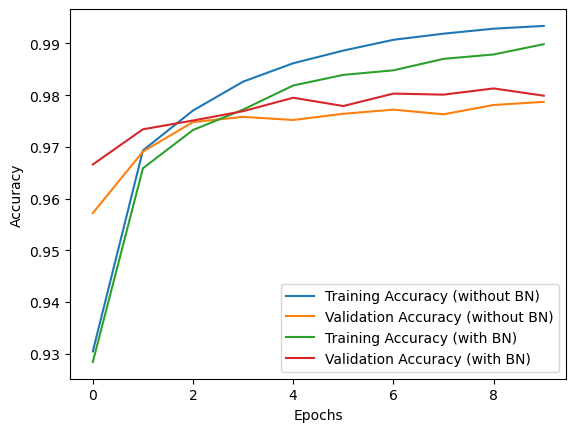

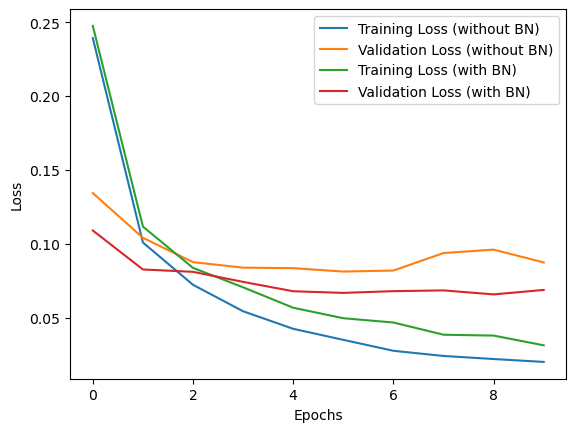

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_without_bn.history['accuracy'], label='Training Accuracy (without BN)')
plt.plot(history_without_bn.history['val_accuracy'], label='Validation Accuracy (without BN)')
plt.plot(history_with_bn.history['accuracy'], label='Training Accuracy (with BN)')
plt.plot(history_with_bn.history['val_accuracy'], label='Validation Accuracy (with BN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_without_bn.history['loss'], label='Training Loss (without BN)')
plt.plot(history_without_bn.history['val_loss'], label='Validation Loss (without BN)')
plt.plot(history_with_bn.history['loss'], label='Training Loss (with BN)')
plt.plot(history_with_bn.history['val_loss'], label='Validation Loss (with BN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Discussion:

- You should observe that the model with batch normalization converges faster and achieves higher accuracy on both the training and validation sets compared to the model without batch normalization.
- Batch normalization helps to stabilize the training process by reducing internal covariate shift and allows for faster convergence by enabling the use of higher learning rates.
- The model with batch normalization shows improved generalization and lower validation loss, indicating better performance on unseen data.

Overall, batch normalization has a significant positive impact on the training process and the performance of the neural network. It is a valuable technique for training deep neural networks effectively and efficiently.

# Q3

In [ ]:
Q3. Experimentation and Analysis:
1. Experiment with different batch sizes and observe the effect on the training dynamics and model
performance.
2. Discuss the advantages and potential limitations of batch normalization in improving the training of
neural networks.

Ans:-
    
1. Experiment with Different Batch Sizes:
Batch size is a hyperparameter that determines the number of training examples used in one iteration (forward and backward pass) to update the model's parameters. Let's experiment with different batch sizes and observe their effects on the training dynamics and model performance. We'll use the same MNIST dataset and feedforward neural network architecture as before.

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2394 - accuracy: 0.9297 - val_loss: 0.1427 - val_accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1012 - accuracy: 0.9693 - val_loss: 0.1016 - val_accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0700 - accuracy: 0.9784 - val_loss: 0.0998 - val_accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0731 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0754 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0791 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.0780 - val_accuracy:

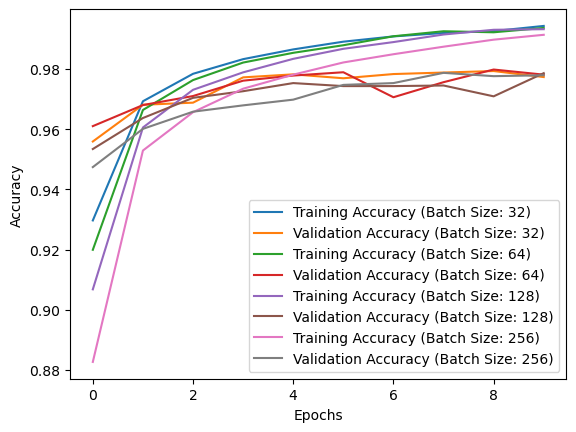

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Load the MNIST dataset and preprocess it
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()
train_images, val_images = train_images / 255.0, val_images / 255.0

# Define the neural network architecture
def create_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Input layer
        layers.Dense(128, activation='relu'),    # Hidden layer 1
        layers.Dense(64, activation='relu'),     # Hidden layer 2
        layers.Dense(10, activation='softmax')   # Output layer
    ])
    return model

# Function to train the model with a given batch size
def train_model(batch_size):
    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=10, validation_data=(val_images, val_labels))
    return history

# Batch sizes to experiment with
batch_sizes = [32, 64, 128, 256]

# Train and plot the training dynamics for different batch sizes
for batch_size in batch_sizes:
    history = train_model(batch_size)
    
    # Plot accuracy
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (Batch Size: {batch_size})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Batch Size: {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We are experimenting with batch sizes of 32, 64, 128, and 256. You can try different batch sizes to observe their impact on the training process. Generally, smaller batch sizes may lead to more noisy gradients and longer training times, while larger batch sizes might cause slower convergence.

1. Advantages and Potential Limitations of Batch Normalization:
Advantages of Batch Normalization:

- Faster Convergence: Batch normalization reduces internal covariate shift, allowing for faster convergence of the model. This leads to a reduction in the number of epochs required to reach a certain level of performance.

- Higher Learning Rates: Batch normalization helps stabilize the training process by normalizing the activations. This allows the use of higher learning rates, which can accelerate training and potentially help the model escape poor local minima.

- Regularization: Batch normalization introduces slight noise through mini-batch statistics, acting as a form of regularization, which can reduce overfitting and improve generalization.

- Independence from Initialization: Batch normalization makes the network less sensitive to weight initialization, making it easier to train deep networks.

##### Potential Limitations of Batch Normalization:

- Batch Size Sensitivity: The effectiveness of batch normalization can be sensitive to the choice of batch size. Smaller batch sizes may lead to noisy estimates of the mean and variance, which could degrade performance.

- Batch Size Impact on Memory: Larger batch sizes may require more memory to store activations, which can be a limitation on devices with limited GPU memory.

- Training and Inference Divergence: During inference, batch normalization should use aggregated statistics from the entire training set. If this is not done, the model's performance during inference may differ from the performance observed during training.

- Added Computational Cost: Batch normalization introduces additional computations to normalize the activations, which may slightly increase the overall training time.

In summary, batch normalization is a powerful technique that improves the training of neural networks by stabilizing and accelerating the convergence process. However, it requires careful tuning and considerations related to batch size, memory constraints, and proper usage during inference. When used effectively, batch normalization can significantly enhance the performance of deep neural networks.